In [ ]:
%pylab inline
import sys
if 'unidecode' not in sys.modules:
    !pip install unidecode
import unidecode
import seaborn as sns
import pandas as pd
sns.set()

Populating the interactive namespace from numpy and matplotlib
     |████████████████████████████████| 245kB 2.7MB/s 


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
in_colab = 'google.colab' in sys.modules

if in_colab:
  BASE_DIR = "https://github.com/DiploDatos/AnalisisYCuracion/raw/master/"
else:
  BASE_DIR = ".."

In [ ]:
tabla_1 = pd.read_csv(BASE_DIR + "/input/wtageinf.csv")
tabla_1.head(10)

,Sex,Agemos,L,M,S,P3,P5,P10,P25,P50,P75,P90,P95,P97
0,1,0.0,1.815151,3.530203,0.152385,2.355451,2.526904,2.773802,3.150611,3.530203,3.879077,4.172493,4.340293,4.446488
1,1,0.5,1.547523,4.003106,0.146025,2.799549,2.964656,3.209510,3.597396,4.003106,4.387423,4.718161,4.910130,5.032625
2,1,1.5,1.068796,4.879525,0.136479,3.614688,3.774849,4.020561,4.428873,4.879525,5.327328,5.728153,5.967102,6.121929
3,1,2.5,0.695974,5.672889,0.129678,4.342341,4.503255,4.754479,5.183378,5.672889,6.175598,6.638979,6.921119,7.106250
4,1,3.5,0.419815,6.391392,0.124717,4.992898,5.157412,5.416803,5.866806,6.391392,6.942217,7.460702,7.781401,7.993878
5,1,4.5,0.219867,7.041836,0.121040,5.575169,5.744752,6.013716,6.484969,7.041836,7.635323,8.202193,8.556813,8.793444
6,1,5.5,0.077506,7.630425,0.118271,6.096775,6.272175,6.551379,7.043627,7.630425,8.262033,8.871384,9.255615,9.513307
7,1,6.5,-0.021908,8.162951,0.116154,6.564430,6.745993,7.035656,7.548346,8.162951,8.828786,9.475466,9.885436,10.161350
8,1,7.5,-0.089441,8.644832,0.114510,6.984123,7.171952,7.472021,8.004399,8.644832,9.341490,10.021014,10.453314,10.744924
9,1,8.5,-0.133409,9.081120,0.113217,7.361236,7.555287,7.865533,8.416719,9.081120,9.805593,10.514064,10.965736,11.270838


In [ ]:
tabla_1.describe()

,Sex,Agemos,L,M,S,P3,P5,P10,P25,P50,P75,P90,P95,P97
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,1.500000,18.000000,-0.159380,10.500653,0.113703,8.555646,8.774327,9.123940,9.746218,10.500653,11.331908,12.156645,12.689973,13.054045
std,0.503322,10.994544,0.627920,2.997212,0.009747,2.581549,2.619041,2.684415,2.815592,2.997212,3.223077,3.471963,3.645593,3.769782
min,1.000000,0.000000,-1.016653,3.399186,0.105084,2.355451,2.526904,2.747222,3.064865,3.399186,3.717519,3.992572,4.152637,4.254922
25%,1.000000,8.500000,-0.562695,8.681272,0.108187,7.040830,7.228790,7.527762,8.054299,8.681272,9.355576,10.015958,10.440824,10.726893
50%,1.500000,18.000000,-0.188634,11.351482,0.110096,9.344228,9.568433,9.927990,10.570385,11.351482,12.212520,13.064862,13.613989,13.987582
75%,2.000000,27.500000,-0.018852,12.884560,0.115375,10.576634,10.832864,11.244542,11.982543,12.884560,13.885523,14.877694,15.570395,16.051213
max,2.000000,36.000000,1.815151,14.329944,0.152385,11.759784,12.039910,12.492682,13.312776,14.329944,15.477724,16.642369,17.408165,17.936247


In [ ]:
tabla_1.dtypes

Sex         int64
Agemos    float64
L         float64
M         float64
S         float64
P3        float64
P5        float64
P10       float64
P25       float64
P50       float64
P75       float64
P90       float64
P95       float64
P97       float64
dtype: object

In [ ]:
tabla_1.columns

Index(['Sex', 'Agemos', 'L', 'M', 'S', 'P3', 'P5', 'P10', 'P25', 'P50', 'P75',
       'P90', 'P95', 'P97'],
      dtype='object')

In [ ]:
tabla_sex_1 = tabla_1[tabla_1.Sex==1]
tabla_sex_2 = tabla_1[tabla_1.Sex==2]
Percentiles = ['P3', 'P5', 'P10', 'P25', 'P50', 'P75', 'P90', 'P95', 'P97']

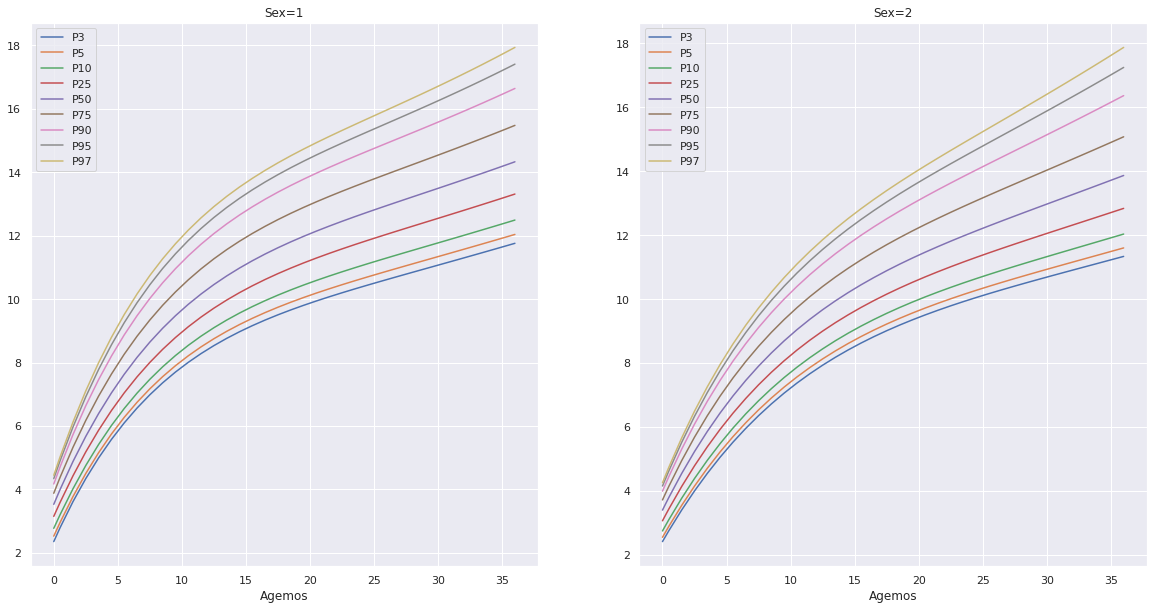

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title('Sex=1')
for P in Percentiles:
    plt.plot(tabla_sex_1.Agemos, tabla_sex_1[P], label=P)
plt.xlabel('Agemos')
plt.legend()

plt.subplot(1,2,2)
plt.title('Sex=2')
for P in Percentiles:
    plt.plot(tabla_sex_2.Agemos, tabla_sex_2[P], label=P)
plt.xlabel('Agemos')
plt.legend()

plt.show()

In [ ]:
json = pd.read_json('https://raw.githubusercontent.com/DiploDatos/AnalisisYCuracion/master/input/pasos.json')

In [ ]:
json[10:20]

,province,location,name
10,Santa Cruz,"[-52.2527012, -69.8852885]",MONTE AYMOND
11,Santa Cruz,"[-52.1304141, -69.5198778]",INTEGRACION AUSTRAL
12,Santa Cruz,"[-50.283977, -72.0558347]",AERO EL CALAFATE
13,Santa Cruz,"[-52.3274981, -68.3692192]",PASO CABO VIRGENES
14,Santa Cruz,"[-51.6117879, -69.3085038]",AERO RIO GALLEGOS
15,AEROPUERTO INTERNACIONAL PILOTO CIVIL NORBERTO...,"[-51.6117879, -69.3085038]",AERO RIO GALLEGOS
16,Santa Cruz,"[-51.6230485, -69.2168291]",PUERTO RIO GALLEGOS
17,Santa Cruz,"[-45.9146467, -71.6458095]",HUEMULES
18,Santa Cruz,"[-50.115518, -68.4132101]",PUERTO PUNTA QUILLA
19,Santa Cruz,"[-50.0247276, -68.5243815]",PUERTO SANTA CRUZ


In [ ]:
#Hacemos minúscula todo
json.province = json.province.str.lower()

In [ ]:
#Eliminamos el aueropuerto
json = json.drop(json.index[(json.province == 'aeropuerto internacional piloto civil norberto fernandez')]).reset_index(drop=True)
json[10:20]

,province,location,name
10,santa cruz,"[-52.2527012, -69.8852885]",MONTE AYMOND
11,santa cruz,"[-52.1304141, -69.5198778]",INTEGRACION AUSTRAL
12,santa cruz,"[-50.283977, -72.0558347]",AERO EL CALAFATE
13,santa cruz,"[-52.3274981, -68.3692192]",PASO CABO VIRGENES
14,santa cruz,"[-51.6117879, -69.3085038]",AERO RIO GALLEGOS
15,santa cruz,"[-51.6230485, -69.2168291]",PUERTO RIO GALLEGOS
16,santa cruz,"[-45.9146467, -71.6458095]",HUEMULES
17,santa cruz,"[-50.115518, -68.4132101]",PUERTO PUNTA QUILLA
18,santa cruz,"[-50.0247276, -68.5243815]",PUERTO SANTA CRUZ
19,santa cruz,"[-49.3068942, -67.7298249]",PUERTO SAN JULIAN


In [ ]:
#Quitamos acentos
json.province = json.province.apply(unidecode.unidecode)

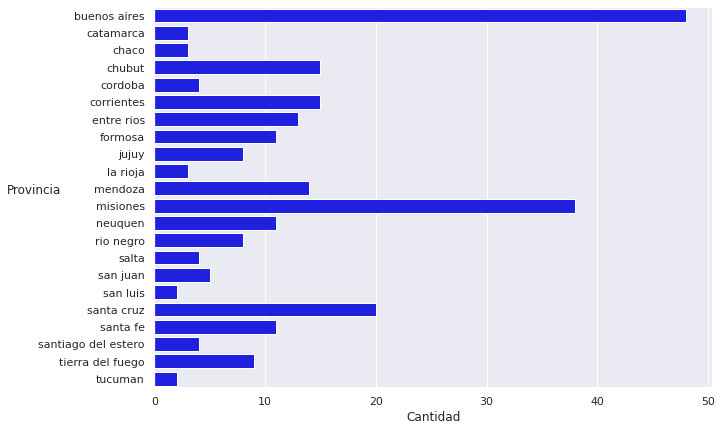

In [ ]:
#Ploteamos por orden alfabético
plt.figure(figsize=(10,7))
sns.countplot(y=json.province, color='blue', order=sorted(json.province.unique()))
plt.ylabel('Provincia', rotation=0)
plt.xlabel('Cantidad')
plt.show()

In [ ]:
edgeList = [[0,2], [1,3], [2,3], [2,4], [3,5], [4,5]]

In [ ]:
size = len(set([n for e in edgeList for n in e])) 
# Creamos la matrix vacía
adjacency = [[0]*size for _ in range(size)]
# Rellenamos la matrix
for sink, source in edgeList:
    adjacency[sink][source] = 1
print(np.asarray(adjacency))

[[0 0 1 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 1 1 0]
 [0 0 0 0 0 1]
 [0 0 0 0 0 1]
 [0 0 0 0 0 0]]


In [ ]:
adj_list  = []
for nodo, amigo in edgeList:
    adj_list.append([])
    adj_list[nodo].append(amigo)
print(adj_list)

[[2], [3], [3, 4], [5], [5], []]
